# PC lab 05: Resampling methods

In [ ]:
!wget https://raw.githubusercontent.com/BioML-UGent/MLLS/main/05_evaluation/pc5.py
!wget https://raw.githubusercontent.com/BioML-UGent/MLLS/main/05_evaluation/promoters.csv

---

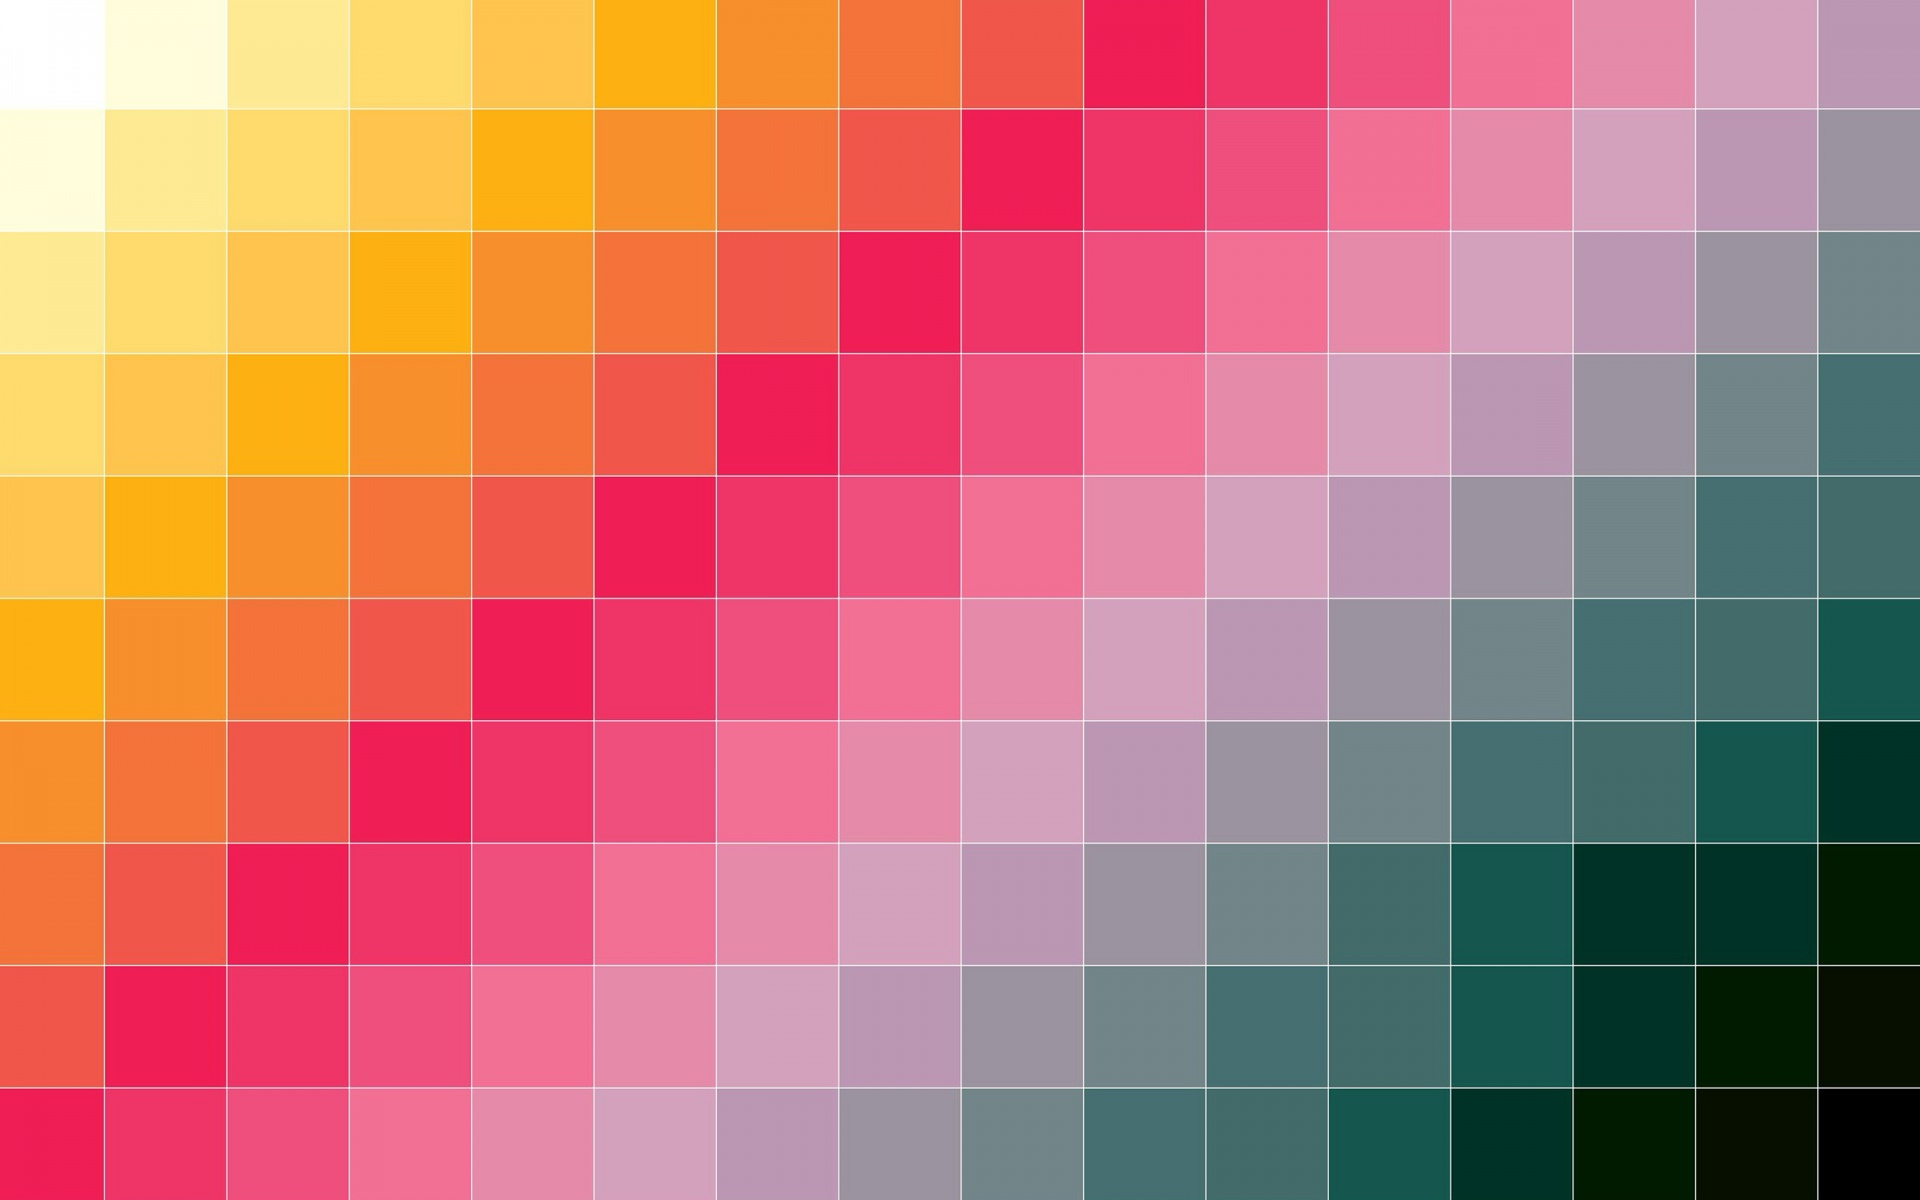

## Introduction

Resampling methods are an indispensable tool in modern statistics. They involve repeatedly drawing samples from a training set and refitting a model of interest on each sample in order to obtain additional information about
the fitted model. For example, in order to estimate the variability of a linear regression fit, we can repeatedly draw different samples from the training data, fit a linear regression to each new sample, and then examine the
extent to which the resulting fits differ. Such an approach may allow us to obtain information that would not be available from fitting the model only once using the original training sample.
Resampling approaches can be computationally expensive, because they involve fitting the same statistical method multiple times using different subsets of the training data. However, due to recent advances in computing
power, the computational requirements of resampling methods generally are not prohibitive. In this PC lab, we discuss two of the most commonly used resampling methods, cross-validation and nested cross-validation.

## Data exploration: A simple promoter library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pc5
plt.style.use('seaborn-white')
%matplotlib inline

<ipython-input-6-8dd325d06499>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


The dataset used is a simpe [E. coli promoter database](https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.names) that contains a set of both promoter regions and non-promoter regions. A promoter region is the DNA sequence upstream of genes to which the RNA polymerase binds before the transcription of genes is initiated.

<div class="alert alert-success">
    <h2>Exercise</h2>
        <p><b>Load in</b> the data and <b>explore</b>. Use <code>pd.Series.value_counts()</code> to evaluate the labels. The data is stored in <code>promoters.csv</code></p>
</div>

In [ ]:
df_data =

In [ ]:
pd.Series.value_counts()

<div class="alert alert-success">
    <h2>Exercise</h2>
                <p><b>Create</b> the features and labels for the model. Create your own features, use results from the previous PC lab or use <code>pc5.CreateDummyNucleotideFeatures()</code>. To explore how this function works, tap `Shift+Tab` within the brackets of the written out function (autocompleted with tapping `Tab`).</p>
</div>

In [ ]:
X = pc5.CreateDummyNucleotideFeatures()

In this section we will elaborate on two specific questions that are strongly related to cross-validation. Both questions stem from the fact that we aim to build models with a high predictive power, based on a finite dataset.
 - **Question 1**: Given a relatively small dataset, how can we use the promoter dataset as efficiently as possible, to construct a model that  optimally predicts the existence of a promoter region in the prokaryotic DNA?
 - **Question 2**: How can we decide which machine learning method should be preferred to predict the presence of a promoter region?


### Question 1: cross-validation

To construct the optimal model, we need to **select the hyperparameter that works best for the model**. Since our data set is small, we want to prevent overfitting of the model on the training data. As a result, two datasets are needed, one to train the initial model (training dataset) and one
to validate the model and choose the model with the optimal hyperparameters (validation- or tuning dataset). The original dataset is split in 2 parts randomly. Often 75% of the data is used for training and 25% for tuning.

$$
Error = \frac{1}{k} \sum_{i=1}^{k} \frac{1}{|s_i|} \sum_{j\in s_i}L(x_j, f(x_j)) \tag{1}\\
$$
$$
Accuracy = \frac{1}{k} \sum_{i=1}^{k} ACC_i
$$

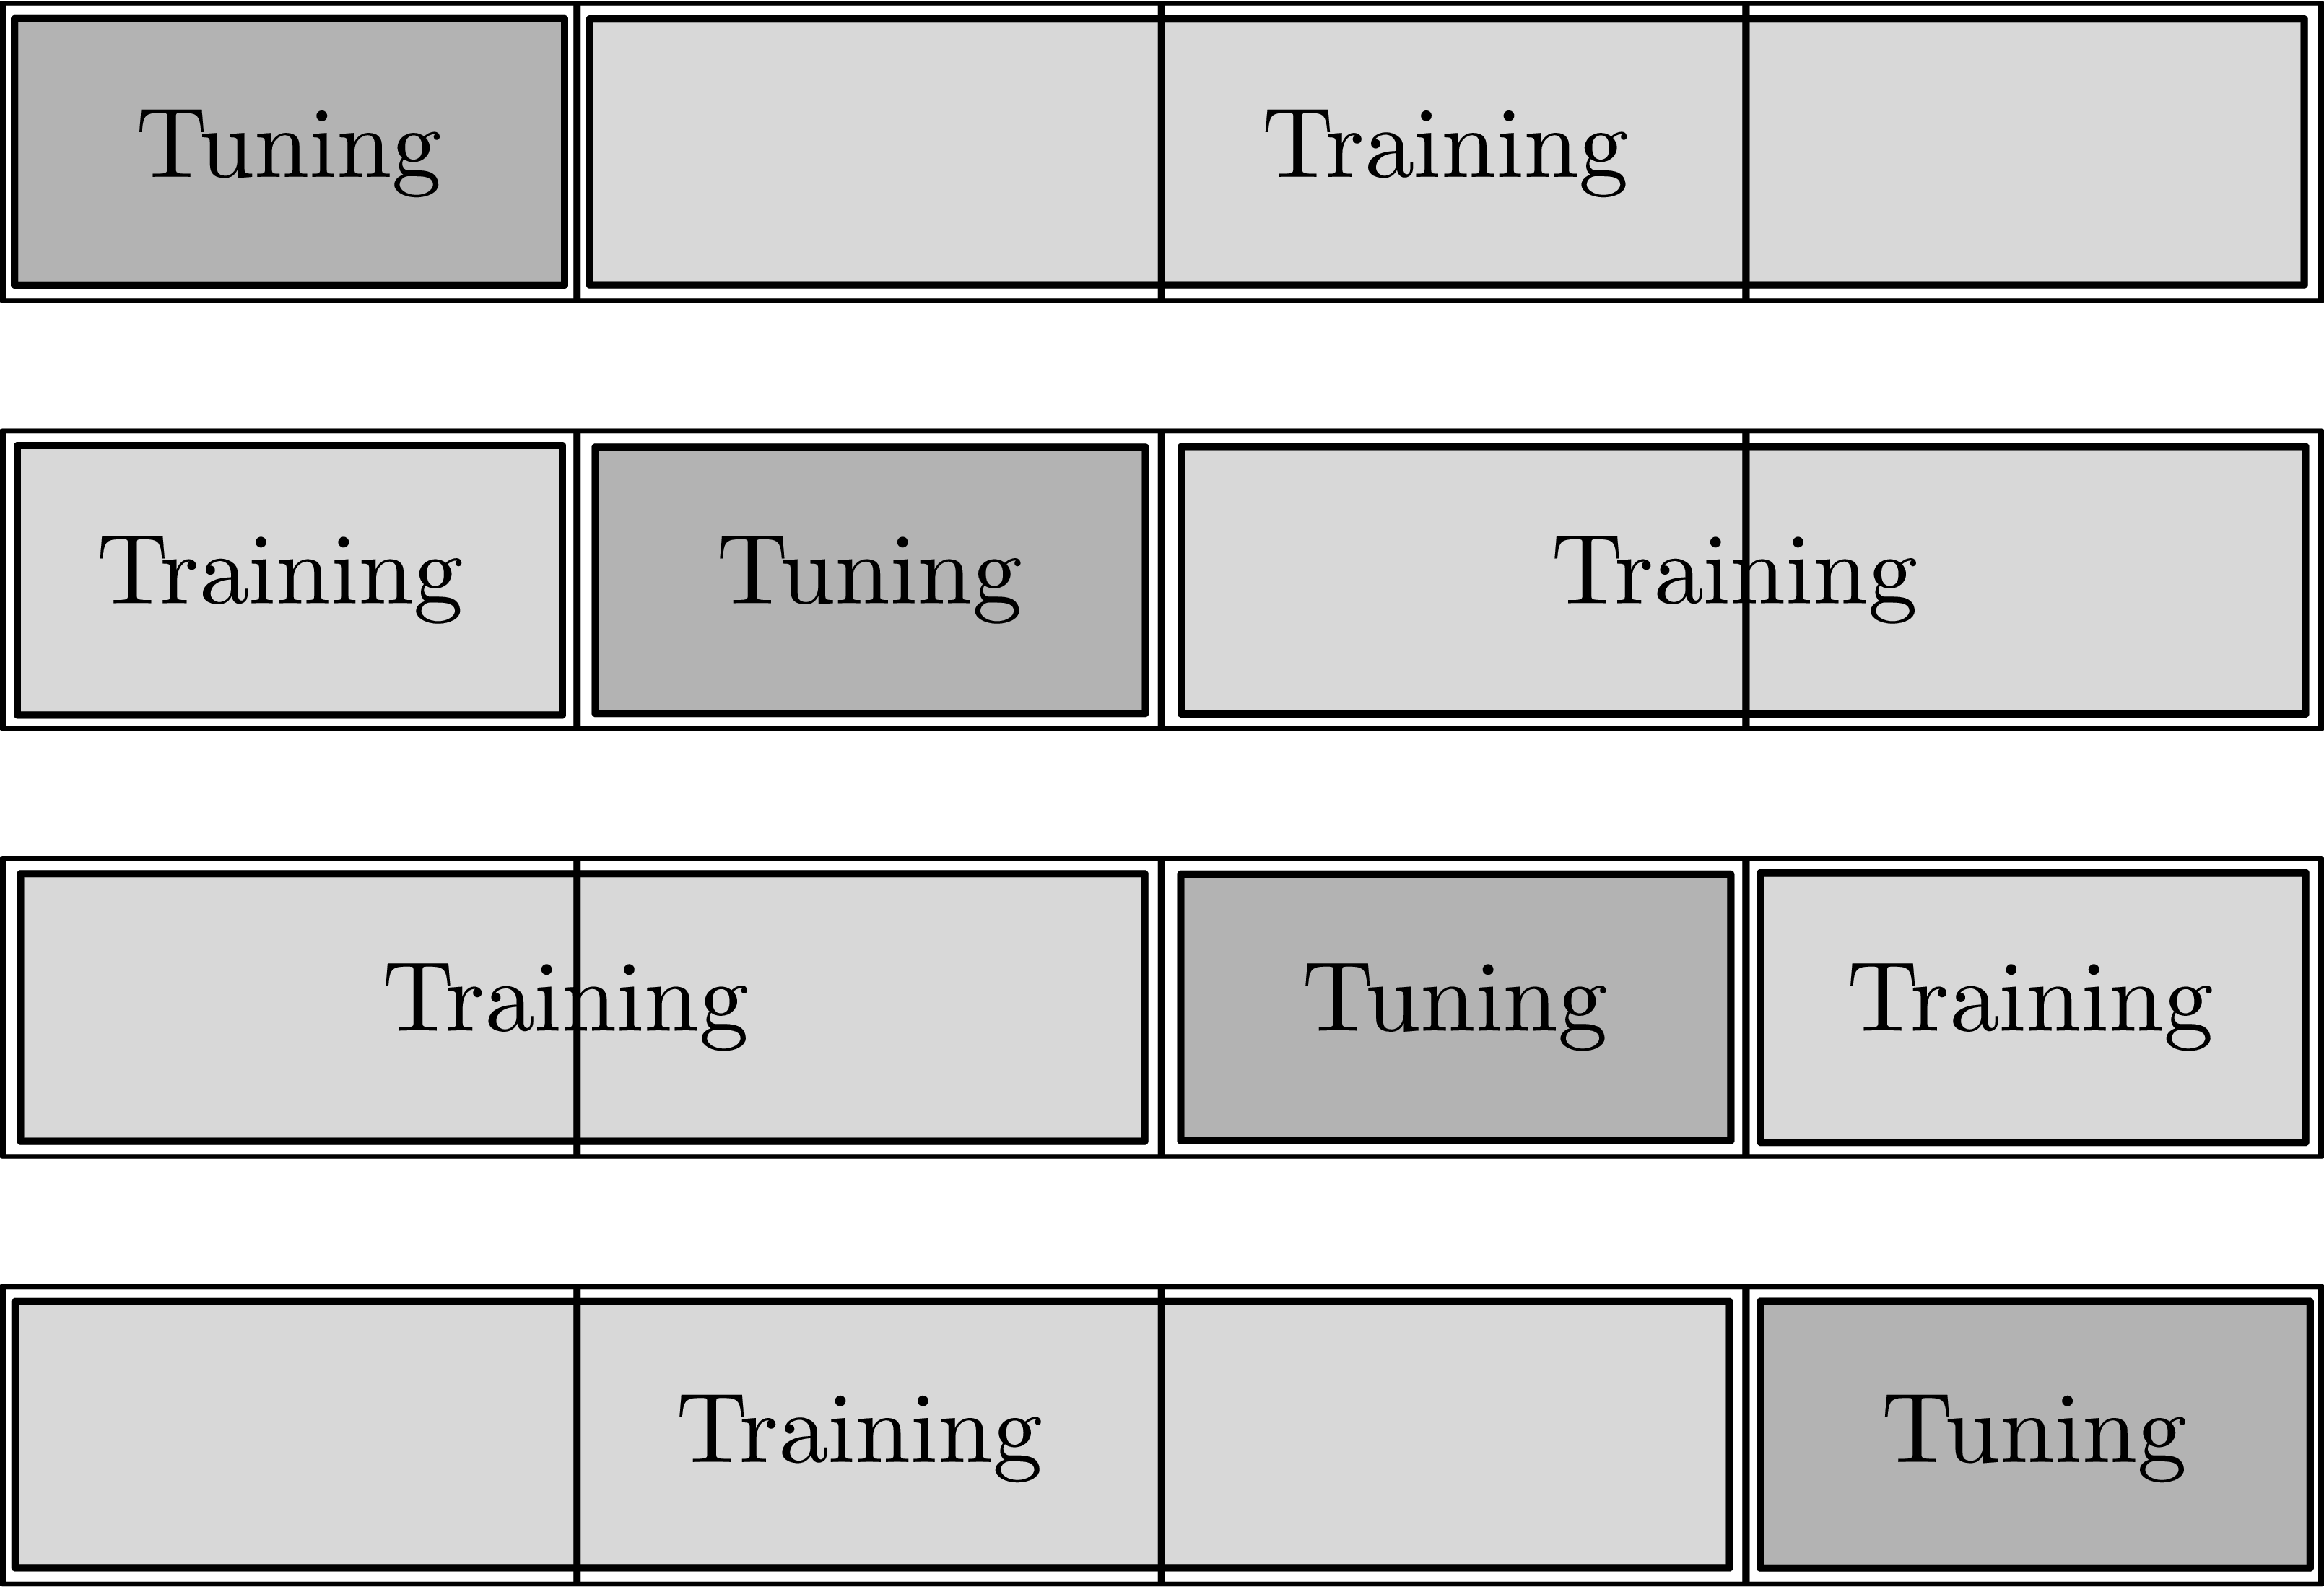

<div class="alert alert-success">
    <h2>Exercise</h2>
        <p><b>Write out</b> code that performs the cross-validation using the <code>StratifiedKFold()</code> function. Use <b>four folds</b> using the nearest neighbors methodology. <b>Determine</b> the optimal amount of neighbors to maximize the model accuracy. Use the example code or start from scratch.</p>

</div>

In [ ]:
fold_scores = []
# define space to iterate over
space = np.arange(1,20)
# define folds
folds = StratifiedKFold()

for ...: # iterate folds
    hyper_scores = []
    for n in space: # iterate over number of neighbors

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(space, np.mean(fold_scores, axis=0))

<div class="alert alert-success">
    <h2>Exercise</h2>
        <p><b>Copy</b> your code from the previous exercize below. Replace the plot function with <code>ax.errorbar()</code> and add the variance of the mean scores. </p>
</div>

In [ ]:
fold_scores = []
# define space to iterate over
space = np.arange(1,20)
# define folds
folds = StratifiedKFold(...)

<div class="alert alert-success">
    <h2>Exercise</h2>
        <p><b>Evaluate</b> the variance of these values for an increasing amount of folds. Use as many folds as possible. Applying cross-validation with $n-1$ folds is considered as <u>Leave-One-Out (LOO) cross-validation</u>.</p>
        <p><b>Consider</b> the advantages and disadvantages of using few/many folds?</p>
</div>


**We strife to select a fold size that has both a stable result (i.e. selected optimal hyperparameter) over different data splits (i.e. random seed, improved by increasing training samples -> more folds) and over the different folds (often improved by decreasing variability of tune set, i.e. more tune samples) -> less folds)**



## Question 2: Nested Cross-Validation

The best model is the one which is able to predict the labels of
new instances most accurately (where accuracy is expressed by a performance measure). To be able **to make an unbiased estimate of your model performance, e.g. for comparison of two different methods**, it is important to exclude any bias. To obtain this estimate, the accuracy of the model must be determined on
a dataset that is neither used for building nor for tuning the models. This dataset is called the test set and is set aside in the very beginning of the model building process. To put this more formally, the following steps are taken:
1. Select a part (for instance 25 %) of the data as test data and put it aside.
2. Use the other part of the data (training/tuning data) to select an optimal set of hyperparameters.
3. Build a new model on the training/tuning data using the optimal hyperparameters
3. Compute the prediction accuracy (or another performance measure) of the final models on the test dataset. Apply for all outer folds and choose the model with the highest averaged accuracy.


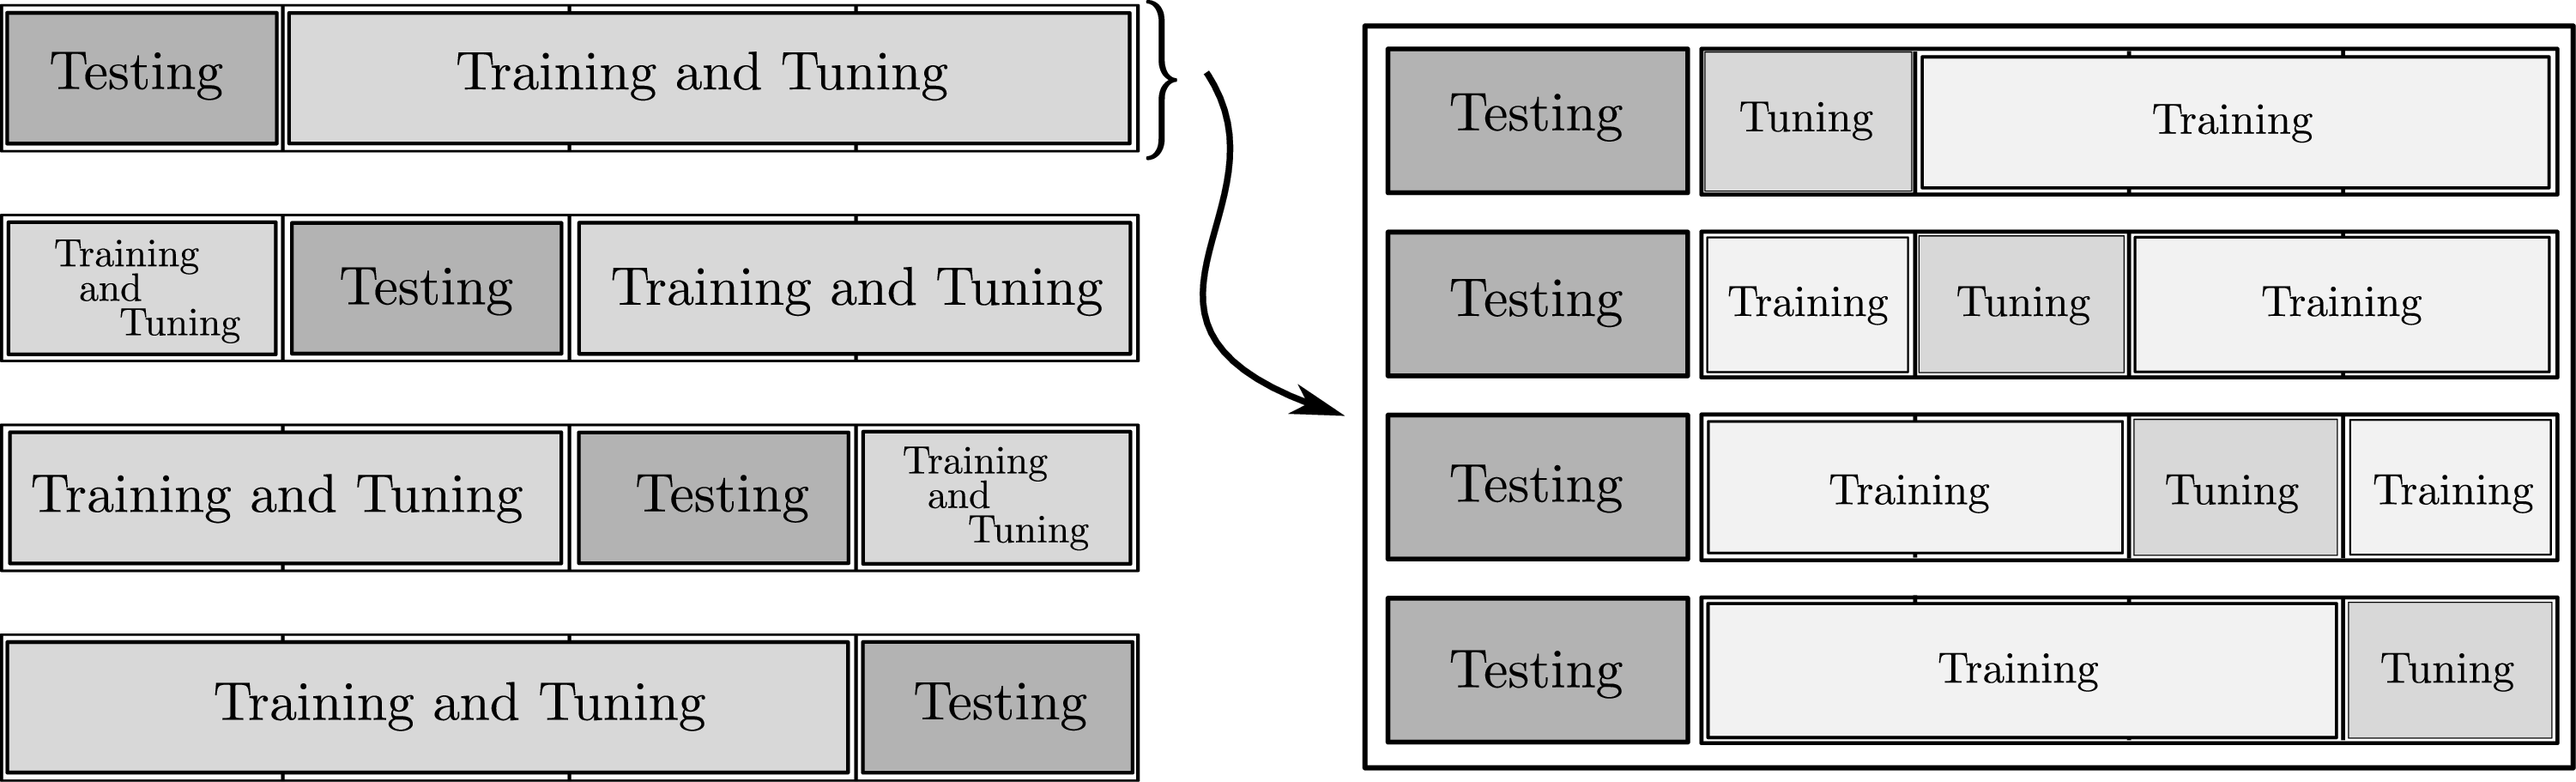

<div class="alert alert-success">
    <h2>Exercise</h2>
        <p><b>Write out</b> code that performs the nested cross-validation. compare the results on two models using k nearest neighbours and logistic discriminant analysis (solver: 'eigen', hyperparameter: 'shrinkage'). </p>
</div>

In [ ]:
# list containing scores on test set
test_scores = []
# list containing max (mean score) on tuning set
max_scores = []
# list optimal hyperparameter for each fold
opt_pars_in = []
opt_pars_out = []
# define space to iterate over
space = np.arange(1,20)
# define folds
outer_splits = 12
inner_splits = 20
outer_folds = StratifiedKFold(n_splits=outer_splits, shuffle=True, random_state=1)
inner_folds = StratifiedKFold(n_splits=inner_splits, shuffle=True, random_state=1)

#split in training/tuning and testing data
for trtu_idx, te_idx in outer_folds.split(...):
    X_trtu, y_trtu = X[...], y[...]
    fold_scores = []
    for tr_idx, tu_idx in inner_folds.split(...):
        hyper_scores = []
        for i, hyper in enumerate(space):
            knn = KNeighborsClassifier(n_neighbors=hyper, metric='jaccard')
            knn.fit(...)
            score = knn.score(...)
            hyper_scores.append(score)
        opt_pars_in.append(space[np.argmax(hyper_scores)])
        fold_scores.append(hyper_scores)
    opt_pars_out.append(space[np.argmax(np.mean(fold_scores, axis=0))])
    # score of model using optimal hyperpar. on tuning data
    max_scores.append(np.max(np.mean(fold_scores, axis=0)))
    # fit and evaluate on test set using optimal parameter
    knn = KNeighborsClassifier(n_neighbors=opt_pars_out[...])
    knn.fit(...)
    test_scores.append(knn.score(...))


fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(np.arange(outer_splits), test_scores, label="Accuracy on test data")
ax.plot(np.arange(outer_splits), max_scores, label="Mean accuracy on tuning data")
ax.set_xlabel('fold')
ax.set_ylabel('performance')
ax.legend()

print("mean test score: {}".format(np.mean(test_scores)))
print("mean tune score: {}".format(np.mean(max_scores)))
#plt.errorbar(space,np.mean(fold_scores,axis=0),np.var(fold_scores,axis=0))

**It is important to notice that nested cross-validation first and foremost is used to evaluate an unbiased performance metric of your method of choice, and can thereby be used to evaluate performances between different types of approaches/models. Visualizing results can give a better interpretation about the quality of your data. Hyperparameter selection is performed using simple cross-validation. When different hyperparameters are selected for different folds (unstable results), one could potentially increase the amount of folds, thereby using more data for training and less for testing, albeit with the cost of running more iterations. In case hyperparameter selection stays unstable it can be due to different factors. Most commonly, not enough data is present, making it impossible to fit the true distribution of the data. In contrast, if the model is too complex, it will easily overfit your data, resulting in common results. It can help to try more simple methods. In many settings the differences between performances of varying hyperparameters are minimal, and can be said to not really be of importance.**

**An interesting discussion on the use of cross validation and nested cross validation can be found [here](https://stats.stackexchange.com/questions/65128/nested-cross-validation-for-model-selection)**

### Note on the dataset

**The dataset used is small in comparison with the amount of features. This causes randomness that often has a significant effect on the results of both the cross-validation and nested cross-validation. When evaluating models with less features or more samples, more stable results are to be expected over different runs of cross-validation. Tweaking the number of folds and decreasing the amount of features can help to reduce the randomness to obtain a more stable result. In the next lectures different approaches will be explained which can help tackle this issues (i.e. regularization)**